In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (13, 3)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
sns.set_style('darkgrid');

In [3]:
data = pd.read_csv('car_data_cleaned.csv')

In [4]:
data.head()

,car_company,variant,car_age,km_driven,fuel_type,seller_type,transmission_type,num_of_ownership,mileage,engine,max_power,num_of_seats,selling_price
0,Maruti,Swift Dzire VDI,7,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5,450000
1,Skoda,Others,7,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5,370000
2,Honda,City 2017-2020 EXi,15,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5,158000
3,Hyundai,Others,11,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5,225000
4,Maruti,Others,14,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5,130000


In [5]:
data.shape

(7440, 13)

### Statistical Summary of the data

In [6]:
data.describe()

,car_age,km_driven,mileage,engine,max_power,num_of_seats,selling_price
count,7440.000000,7440.000000,7440.000000,7440.000000,7440.000000,7440.000000,7.440000e+03
mean,6.954704,67784.309812,19.639101,1420.104301,87.708132,5.415323,5.279845e+05
std,3.560922,42516.668771,3.863587,462.143252,28.562576,0.947801,4.082696e+05
min,1.000000,1.000000,9.000000,624.000000,32.800000,4.000000,3.150400e+04
25%,4.000000,35000.000000,17.000000,1197.000000,68.050000,5.000000,2.650000e+05
50%,6.000000,60000.000000,19.670000,1248.000000,81.860000,5.000000,4.500000e+05
75%,9.000000,95000.000000,22.540000,1498.000000,100.000000,5.000000,6.500000e+05
max,18.000000,239451.000000,30.460000,2956.000000,198.250000,14.000000,3.000000e+06


### Univariate Analysis

- Numerical Variables

In [7]:
num_cols = ['car_age','km_driven', 'mileage', 'engine', 'max_power', 'num_of_seats']

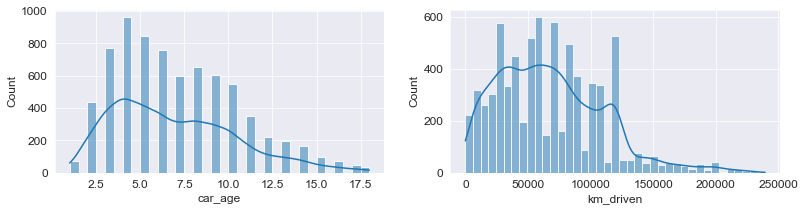

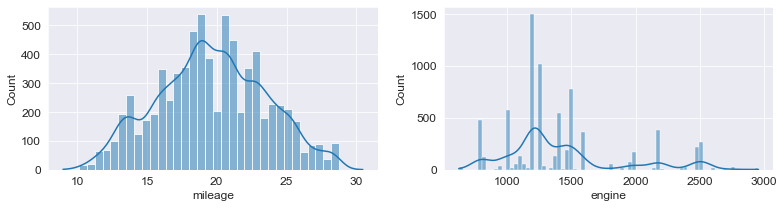

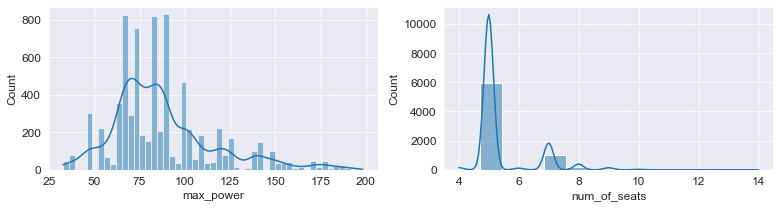

In [8]:
i = 0
while i < 6:
    
    plt.subplot(1, 2, 1)
    sns.histplot(x = num_cols[i], data = data, kde = True)
    i += 1
    
    plt.subplot(1, 2, 2)
    sns.histplot(x = num_cols[i], data = data, kde = True)
    i += 1
    
    plt.show()

The above histograms represents that the data points are skewed even after applying z-score method. Robust models like Decision tree, Random Forest, etc would be much more efficient as compared to other regression based models on this dataset

* Categorical Columns

In [9]:
cat_cols = ['fuel_type', 'seller_type', 'transmission_type', 'num_of_ownership']

In [10]:
car_company_count = data['car_company'].value_counts().to_frame()
car_company_count.rename(columns = {'car_company' : 'value_count'}, inplace = True)
car_company_count.index.name = 'car_company'
car_company_count

,value_count
car_company,
Maruti,2293
Hyundai,1347
Mahindra,744
Tata,708
Honda,462
Ford,382
Toyota,381
Chevrolet,228
Renault,226


In [11]:
fuel_type_count = data['fuel_type'].value_counts().to_frame()
fuel_type_count.rename(columns = {'fuel_type' : 'value_count'}, inplace = True)
fuel_type_count.index.name = 'fuel_type'
fuel_type_count

,value_count
fuel_type,
Diesel,3977
Petrol,3384
CNG,45
LPG,34


In [12]:
seller_type_count = data['seller_type'].value_counts().to_frame()
seller_type_count.rename(columns = {'seller_type' : 'value_count'}, inplace = True)
seller_type_count.index.name = 'seller_type'
seller_type_count

,value_count
seller_type,
Individual,6287
Dealer,917
Trustmark Dealer,236


In [13]:
transmission_count = data['transmission_type'].value_counts().to_frame()
transmission_count.rename(columns = {'transmission_type' : 'value_count'}, inplace = True)
transmission_count.index.name = 'transmission_type'
transmission_count

,value_count
transmission_type,
Manual,6682
Automatic,758


In [14]:
owner_count = data['num_of_ownership'].value_counts().to_frame()
owner_count.rename(columns = {'num_of_ownership' : 'value_count'}, inplace = True)
owner_count.index.name = 'num_of_ownership'
owner_count

,value_count
num_of_ownership,
First Owner,4898
Second Owner,1924
Third Owner,479
Fourth Owner,139


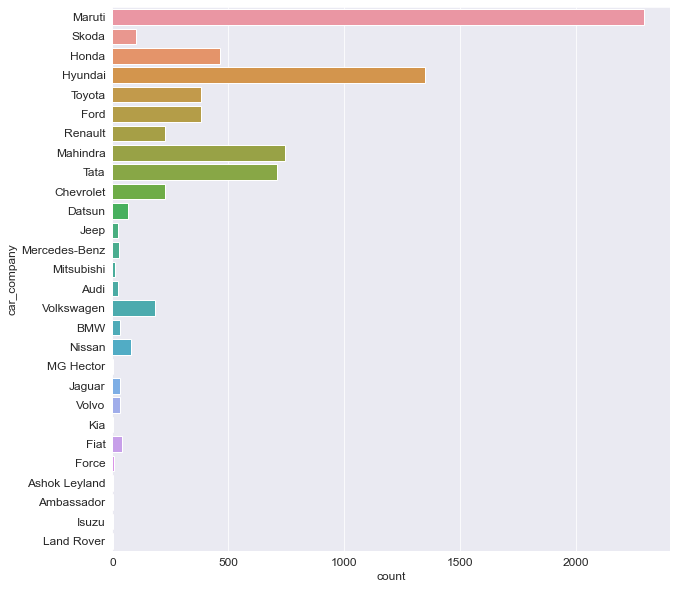

In [15]:
plt.figure(figsize=(10, 10))
sns.countplot(y = 'car_company', data = data);

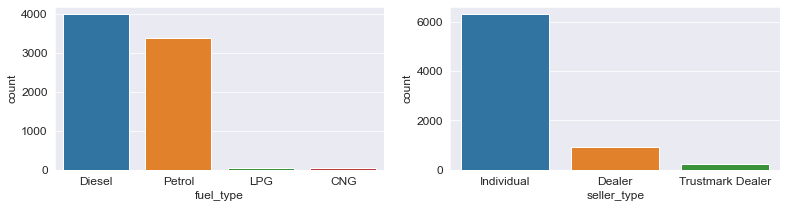

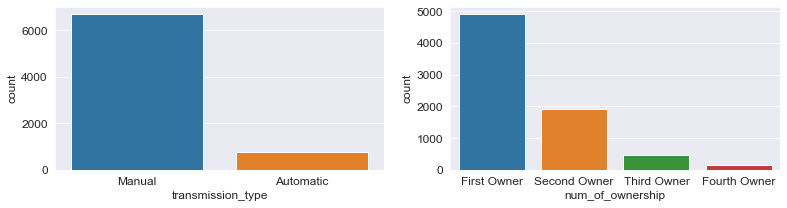

In [16]:
i = 0
while i < 4:
    
    plt.subplot(1, 2, 1)
    sns.countplot(x = cat_cols[i], data = data)
    i += 1
    
    plt.subplot(1, 2, 2)
    sns.countplot(x = cat_cols[i], data = data)
    i += 1
    
    plt.show()

The above graphs represents value count of each categorical variable in the dataset. These graphs gives following insights about the data:

    1. Mostly "Maruti" cars are present in the dataset
    2. Mostly diesel cars are present in the dataset
    3. Maximum number of sellers are "indiviual" in the dataset
    4. Maximum cars are of manual transmission in the dataset
    5. Mostly cars are singly owned in the dataset

### Bi-Variate Analysis

- Continuous Numerical Variable

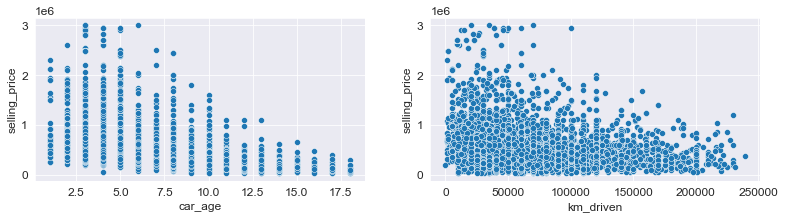

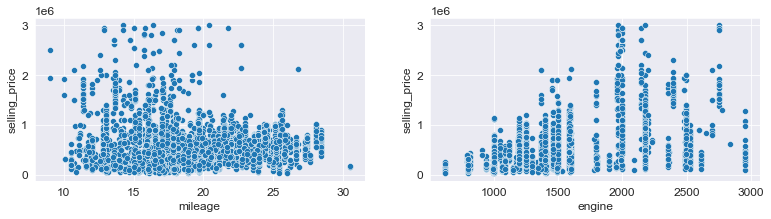

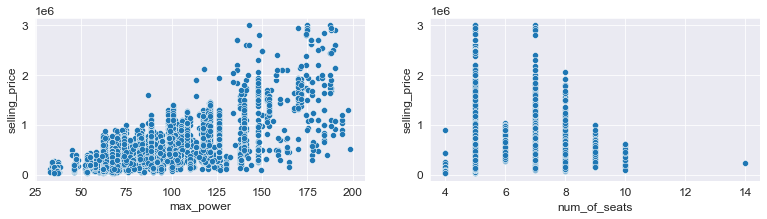

In [17]:
i = 0
while i < 6:
    
    plt.subplot(1, 2, 1)
    sns.scatterplot(x = num_cols[i], y = 'selling_price', data = data)
    i += 1
    
    plt.subplot(1, 2, 2)
    sns.scatterplot(x = num_cols[i], y = 'selling_price', data = data)
    i += 1
    
    plt.show()

The above scattered plots represents the relationship of various numerical features with respect to selling price of a car. These plots gives followings insights from the dataset:

    1. The selling price of car reduces when km travelled by car increases
    2. The selling price of car increases when max_power of car increases
    3. As the capacity of engine increases its price increases
    4. Mostly cars are 5 seater in the dataset
    5. As the age of car increases selling price of the car decreases


- Categorical Columns

In [18]:
group = data[['car_company','fuel_type', 'seller_type', 'transmission_type', 'num_of_ownership', 'selling_price']]

In [19]:
group_one = group.groupby(['car_company']).mean().sort_values(by = 'selling_price', ascending = False)
group_one

,selling_price
car_company,
Jaguar,2.672667e+06
Volvo,2.419531e+06
Audi,2.022000e+06
Land Rover,2.000000e+06
MG Hector,1.783333e+06
Mercedes-Benz,1.740704e+06
BMW,1.681613e+06
Jeep,1.681520e+06
Isuzu,1.575000e+06


In [20]:
group_two = group.groupby(['fuel_type']).mean().sort_values(by = 'selling_price', ascending = False)
group_two

,selling_price
fuel_type,
Diesel,627886.287905
Petrol,416577.601359
CNG,318244.377778
LPG,208264.705882


In [21]:
group_three = group.groupby(['seller_type']).mean().sort_values(by = 'selling_price', ascending = False)
group_three

,selling_price
seller_type,
Dealer,846053.388222
Trustmark Dealer,801838.983051
Individual,471312.137745


In [22]:
group_four = group.groupby(['transmission_type']).mean().sort_values(by = 'selling_price', ascending = False)
group_four

,selling_price
transmission_type,
Automatic,1.091286e+06
Manual,4.640840e+05


In [23]:
group_five = group.groupby(['num_of_ownership']).mean().sort_values(by = 'selling_price', ascending = False)
group_five

,selling_price
num_of_ownership,
First Owner,613559.013679
Second Owner,391737.687630
Third Owner,284410.258873
Fourth Owner,237816.496403


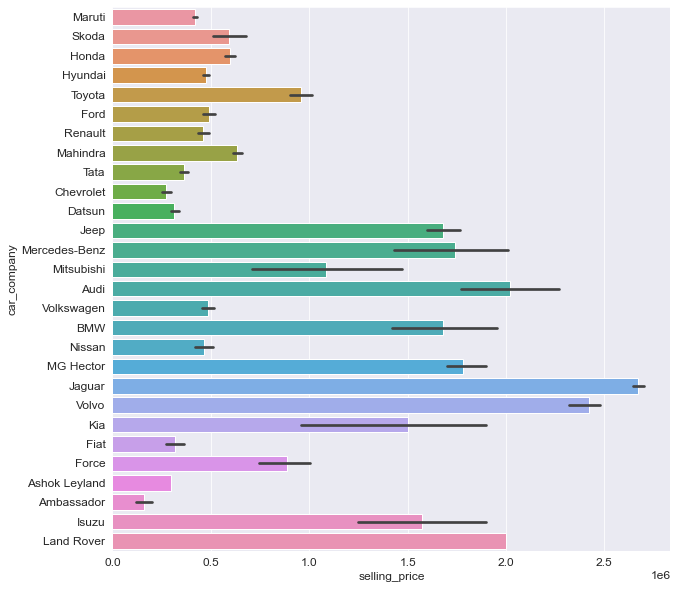

In [24]:
plt.figure(figsize=(10, 10))
sns.barplot(x = 'selling_price', y = 'car_company', data = data);

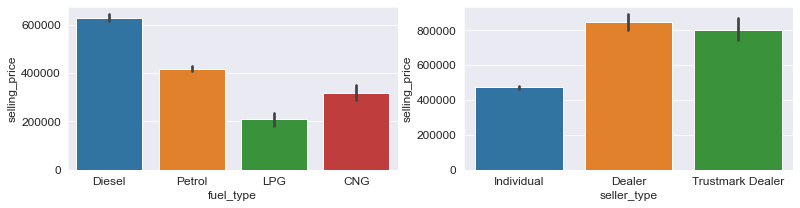

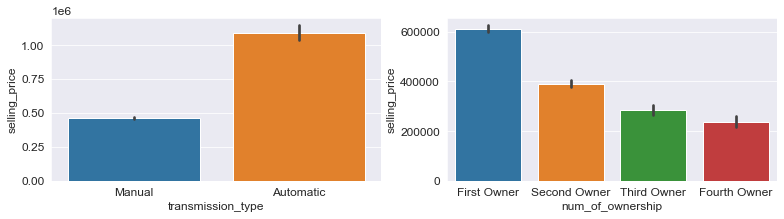

In [25]:
cat_cols = ['fuel_type', 'seller_type', 'transmission_type', 'num_of_ownership']
i = 0
while i < 4:
    
    plt.subplot(1, 2, 1)
    sns.barplot(x = cat_cols[i], y = 'selling_price', data = data)
    i += 1
    
    plt.subplot(1, 2, 2)
    sns.barplot(x = cat_cols[i], y = 'selling_price', data = data)
    i += 1
    
    plt.show()

The above boxplots represent the realtionship of categorical features with respect to selling price of a car. These plots gives the following insights from the dataset:

    1. Jaguar, Volvo and Audi manufactures premium cars
    2. Diesel cars are more costlier as compared to other fuel types
    3. Dealer and Trusted Dealer sell cars at much higher rates that an indiviual
    4. Automatic Transmission cars are much more costlier than manual transmission car
    5. As the number of ownership of car increases selling price of car decreases